In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### This notebook contains an analysis of the original duplicate dataset. While we explored this data, we realized that over two million of the duplicate tickets were mapping back to the same license plate hash. This hash value was used for all tickets with missing license plate numbers. We subsequently removed these observations.

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_csv("/Users/ServantezTech/Desktop/cleaned_duplicates.csv", delimiter=',', dtype = object)

In [10]:
data.groupby("ward").size().sort_values(ascending=False)

ward
42    161334
44     67253
2      59508
27     58936
4      53581
43     45484
25     35575
1      34950
46     29791
28     28180
48     27697
3      27406
5      26936
49     25030
32     23050
35     22219
20     21513
16     21401
33     20834
26     20734
47     20304
6      20031
24     19992
17     17975
40     17637
15     16181
37     15532
12     15527
50     15018
29     14103
8      13767
7      13758
22     13510
30     13117
11     13028
31     12995
14     11456
21     10895
23      9906
34      8114
36      7693
39      7613
45      7203
41      6942
9       6266
10      5983
38      4850
18      3890
13      3785
19      3056
dtype: int64

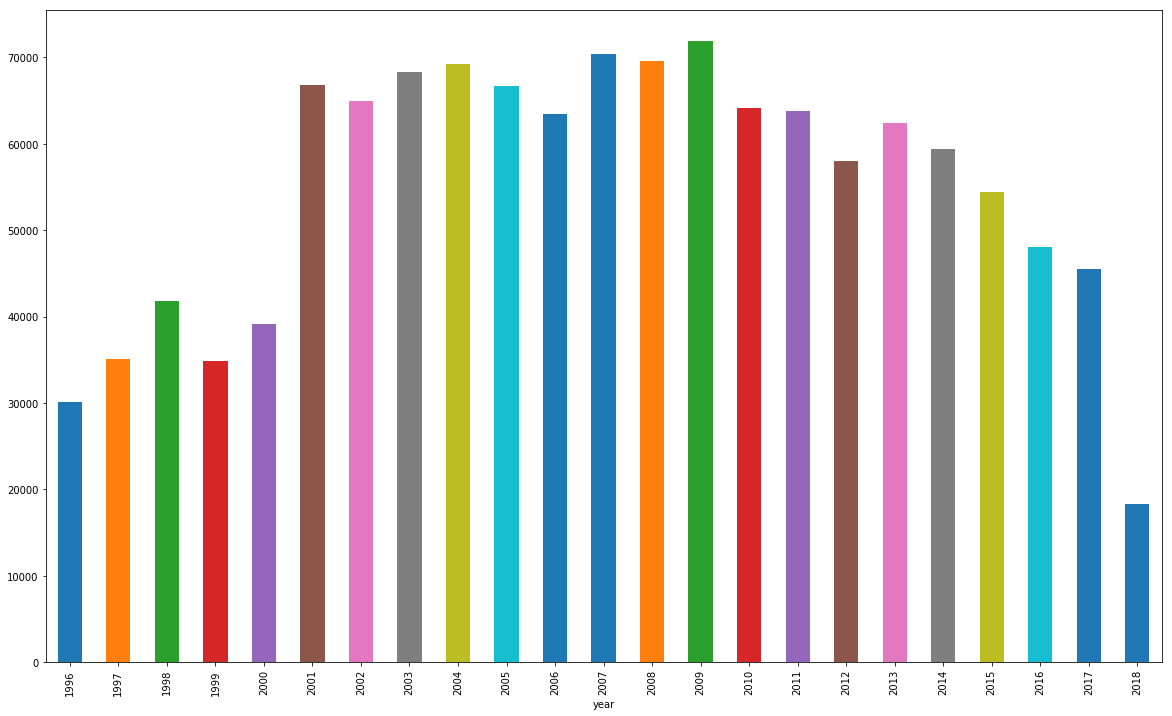

In [11]:
data.groupby("year").size().sort_index().plot(kind="bar", figsize=(20,12))

,description,frequency
0,CPD,671707
1,DOF,422728
2,Unidentified,107345
3,Miscellaneous,48456
4,CPD-Other,12554
5,CPD-Airport,3542
6,CTA,11


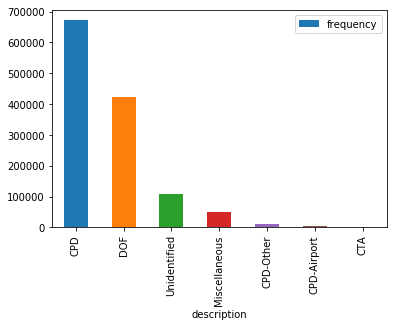

In [12]:
units = data.unit_description.value_counts()
unit_desc = pd.DataFrame({'description':units.index, 'frequency':units.values})
unit_desc.plot(kind='bar', x='description', y='frequency')
unit_desc

In [13]:
data["fine_level1_amount"] = data["fine_level1_amount"].astype(int)
data.groupby("ward").mean().sort_values("fine_level1_amount")

,fine_level1_amount
ward,
44,50.948880
43,51.157440
48,51.638986
27,51.930993
4,52.987999
41,53.429127
47,53.462864
2,53.488186
42,54.016388


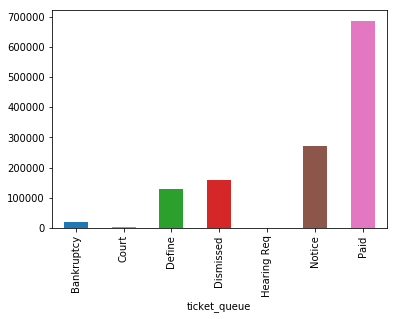

In [14]:
data.groupby("ticket_queue").size().plot(kind='bar', x="index", y="values")

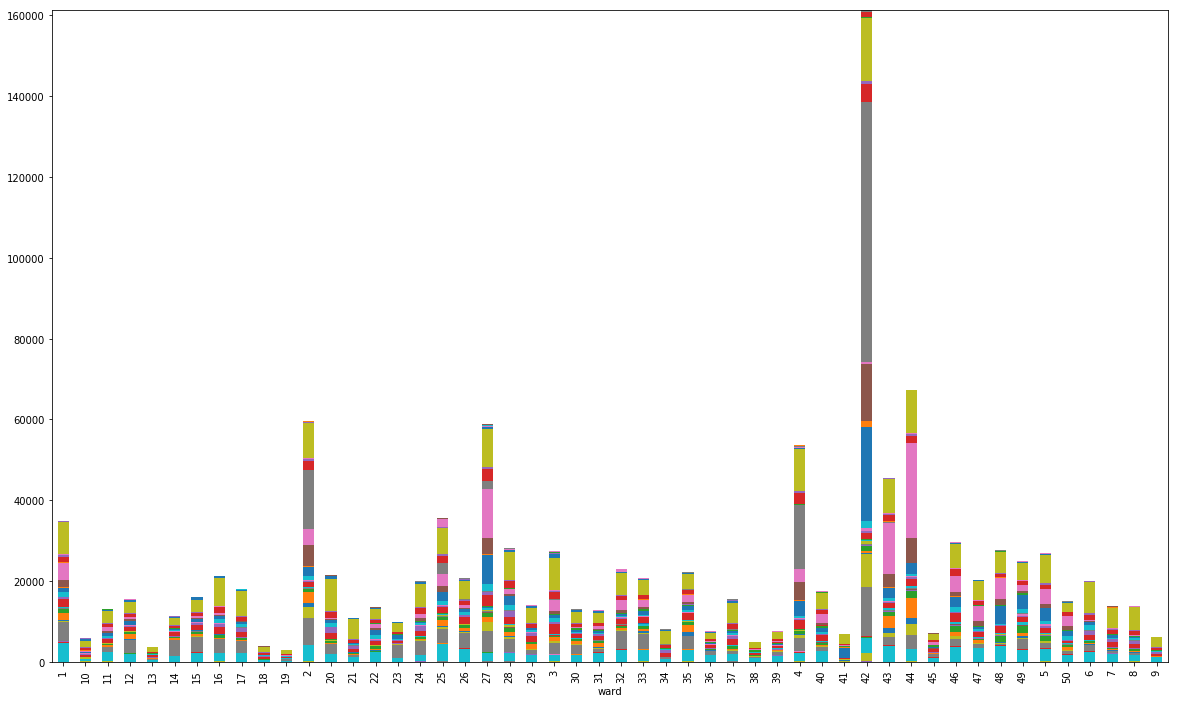

In [15]:
data.groupby(["ward", "violation_code"]).size().unstack().plot(kind="bar", stacked=True, figsize=(20,12), legend = False)
plt.show()

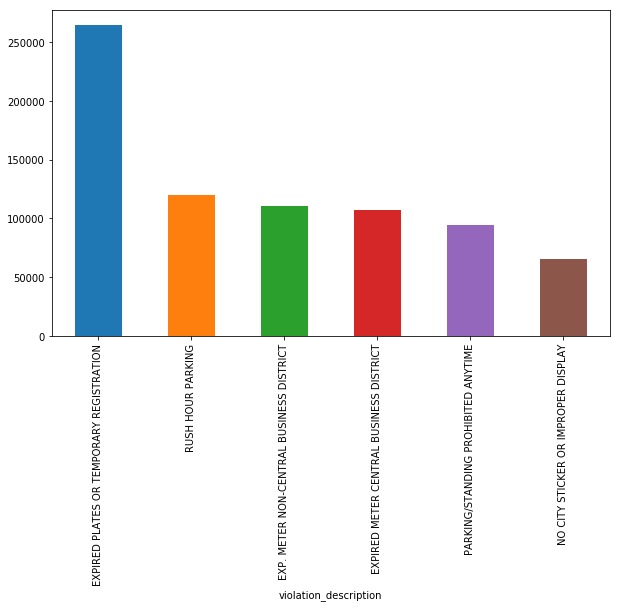

In [28]:
data.groupby("violation_description").size().sort_values(ascending=False)[:6].plot(kind="bar", stacked=True, figsize=(10,6), legend = False)
plt.show()

In [4]:
data.groupby("violation_description").size().sort_values(ascending=False)[:50]

violation_description
EXPIRED PLATES OR TEMPORARY REGISTRATION              264178
RUSH HOUR PARKING                                     119457
EXP. METER NON-CENTRAL BUSINESS DISTRICT              110775
EXPIRED METER CENTRAL BUSINESS DISTRICT               106801
PARKING/STANDING PROHIBITED ANYTIME                    93963
NO CITY STICKER OR IMPROPER DISPLAY                    65703
STREET CLEANING                                        62430
REAR AND FRONT PLATE REQUIRED                          57580
EXPIRED METER OR OVERSTAY                              57372
STREET CLEANING OR SPECIAL EVENT                       52233
RESIDENTIAL PERMIT PARKING                             37743
WITHIN 15' OF FIRE HYDRANT                             30072
PARK OR STAND IN BUS/TAXI/CARRIAGE STAND               29482
NO STANDING/PARKING TIME RESTRICTED                    26897
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.     23516
EXPIRED PLATE OR TEMPORARY REGISTRATION                11510
SA

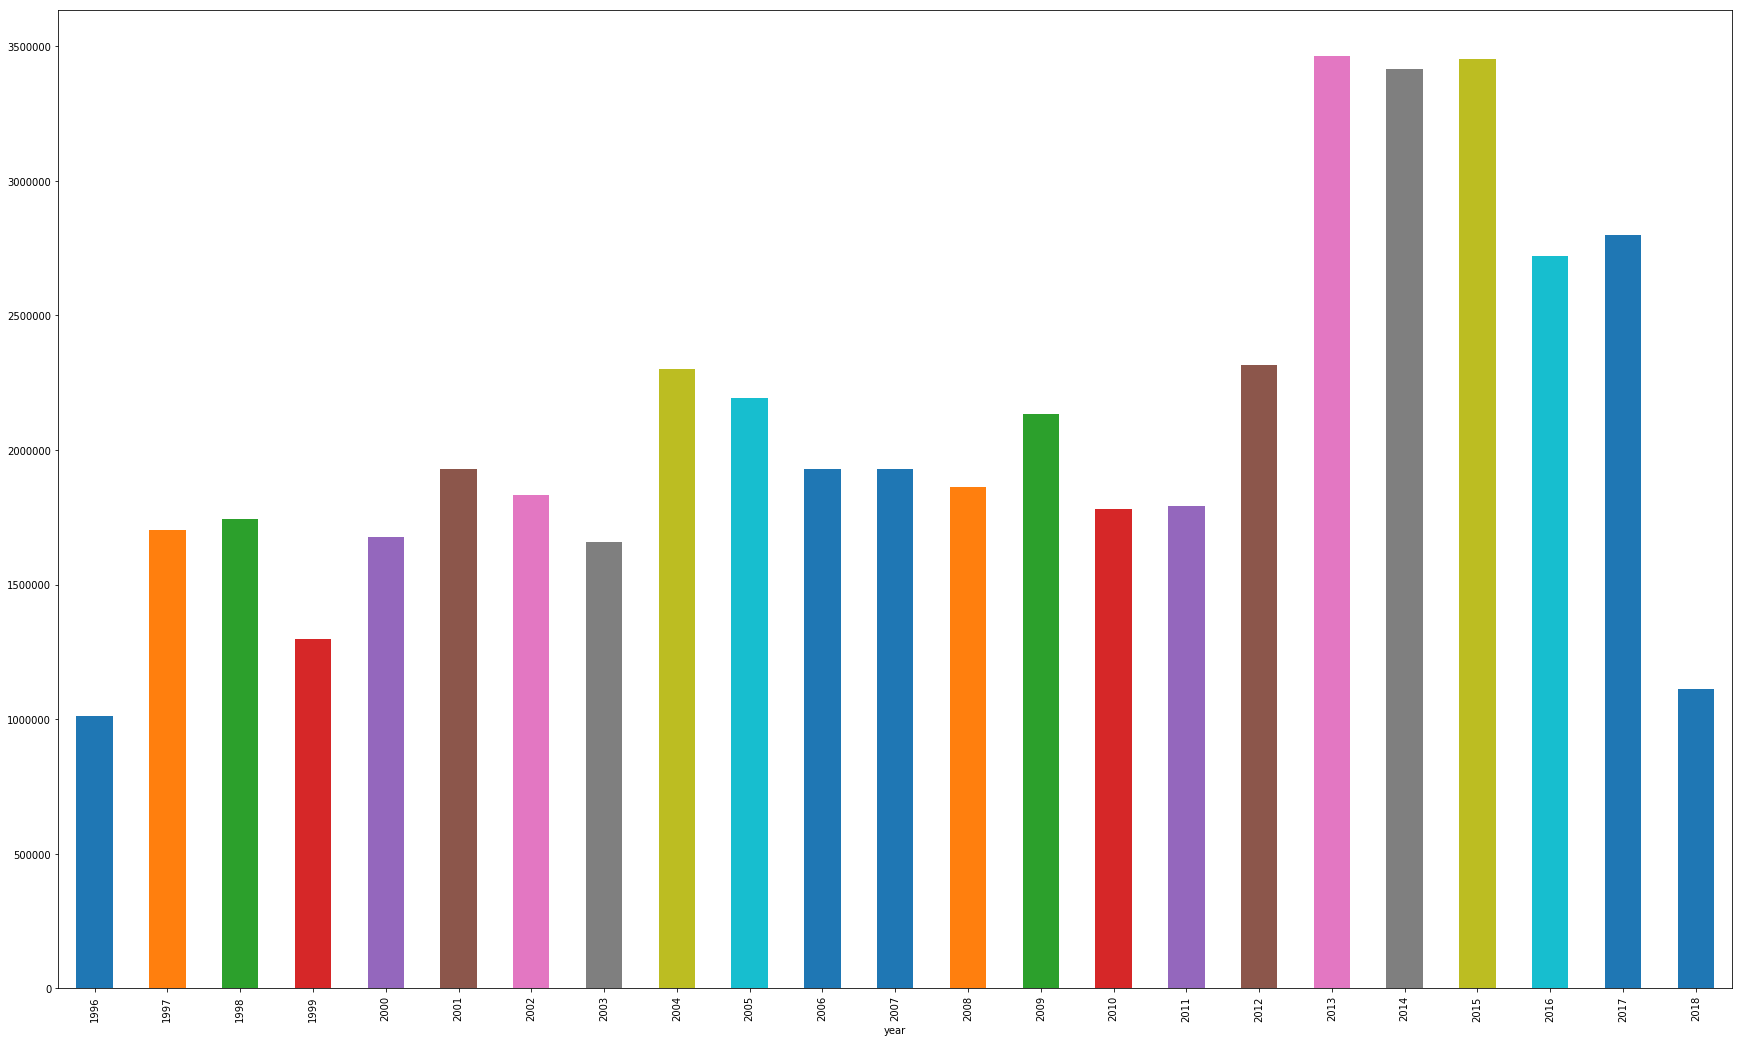

In [19]:
data["current_amount_due"] = data["current_amount_due"].astype(float)
data.groupby("year")["current_amount_due"].sum().plot(kind="bar", figsize=(30,18))

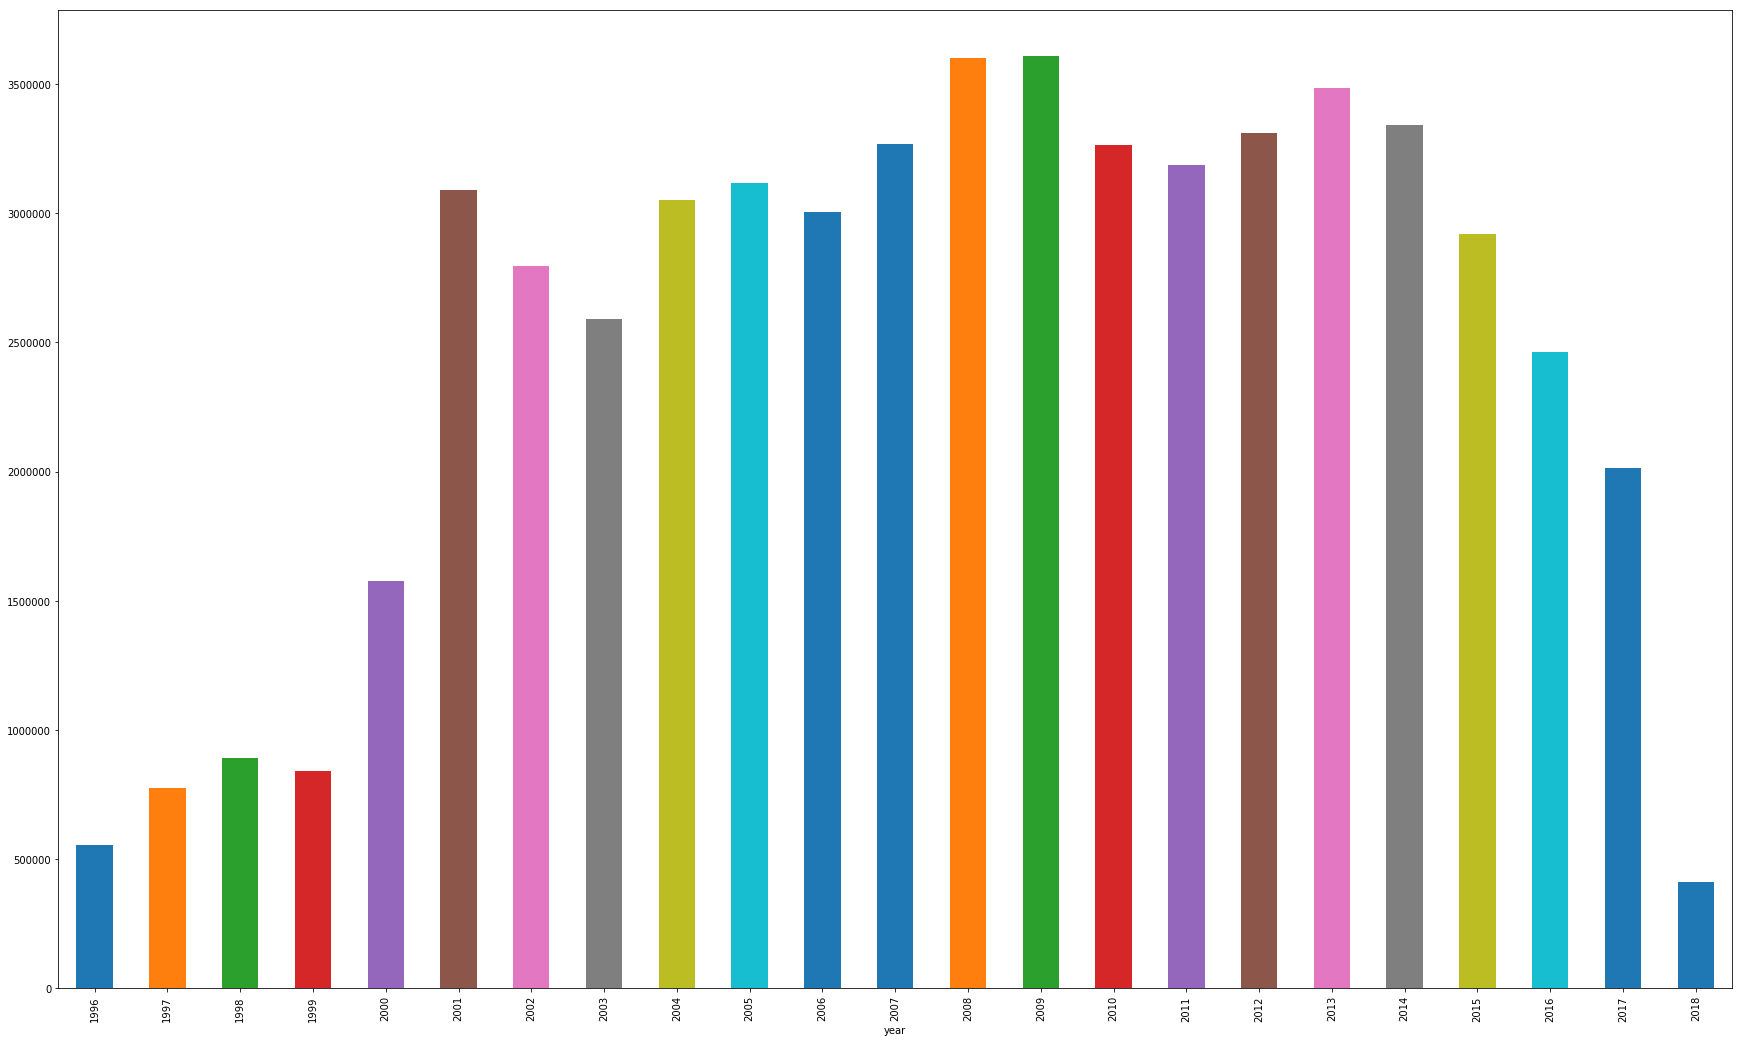

In [20]:
data["total_payments"] = data["total_payments"].astype(float)
data.groupby("year")["total_payments"].sum().plot(kind="bar", figsize=(30,18))

In [40]:
data.shape

(3265162, 32)

In [21]:
data.groupby("license_plate_number").size().sort_values(ascending=False)[:50]

license_plate_number
e4fe6b20bfe6fe56ef1292bb6f82c1057de21d854e5de9aed7f5eae305986a54    2115
8060708b2cf32859b90422129518a0e4d47ba1e78a817b13189489c15cc12aae    1476
eaa7ae11b0917c79e049d533fb64c26ea84f52a38c115ff7bcc218a6c0f15730     464
d5129b4e0e6b9d5eb6a860491001f175f77978071865ed58c0e1ee5bdd054069     414
c2d4ff111f9266ea0baed78e39053e49802083fa82710440a261898dfd3730ae     409
f7d3ae3a3382cad913c3b7631441a9c01af8aaf7ad4f13d434523cef519acaf5     396
1583e8cfea365ae454ec70845d2e83fc3a5cbc800050d4188ff43c4321ee9e6e     396
66978f0ef6b8a3f64fb904f72eff8ca0a8c33102c911a4835341168872b75479     350
df6adfc5e159a07a2645e7c263331a312b1f8b66cae3113cf88d46d08b296100     326
80a31124d61dd0210124c4abbe8ca6a2c2208210e12c13218242024af141d0fe     238
035643baba9b136433da19a02b2922932a5288b95a0fe824590193ae7166aef4     221
71e00e7099266ee5a238682b7287fd208f27007b192fb285966432c6f9982a82     217
9fd4b8dda342373d3dee53d6f001bf7a4f6dfb03e46c9e408c3ac69fb14eb741     187
e33abd12e32d45b431ca39f64162c4

In [47]:
data[data["license_plate_number"] == "c2083069204047c50c2792d39043ef36e1e3eacefdd137a6a78ef253ad66596a"]

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,notice_number,dismissal_reason,officer,normalized_address,year,month,hour,ward,geocode_accuracy,geocode_accuracy_type,geocoded_address,geocoded_lng,geocoded_lat
2,27371710,1998-01-02 01:22:00,7254 S RACINE,c2083069204047c50c2792d39043ef36e1e3eacefdd137...,NaN,NaN,000000000,0964140B,PARK OR STAND IN BUS/TAXI/CARRIAGE STAND,7,CPD,LINC,30,60,30.0,0.0,Define,1998-11-24 00:00:00,NaN,0,NaN,10594,"7200 s racine, Chicago, IL",1998,1,1,6,1,rooftop,"7200 S Racine Ave, Chicago, IL 60636",-87.654424,41.763112
253,1998030642,1998-01-15 01:00:00,117 S HOMAN 3RD FLR.,c2083069204047c50c2792d39043ef36e1e3eacefdd137...,IL,PAS,606240000,0724225,IMPOUND-UNLAWFUL DRUGS,11,CPD,CHEV,500,500,500.0,0.0,Notice,1999-02-16 00:00:00,DETR,5038834010,NaN,6872,"100 s homan 3rd flr., Chicago, IL",1998,1,1,28,1,range_interpolation,"100 S Homan Ave, Chicago, IL 60624",-87.710965,41.879441
291,27569563,1998-01-17 21:05:00,632 N LOTUS,c2083069204047c50c2792d39043ef36e1e3eacefdd137...,NaN,NaN,000000000,0964040B,STREET CLEANING OR SPECIAL EVENT,25,CPD,OLDS,50,100,50.0,0.0,Define,1998-12-02 00:00:00,NaN,0,NaN,13394,"600 n lotus, Chicago, IL",1998,1,21,37,1,range_interpolation,"600 N Lotus Ave, Chicago, IL 60644",-87.76198,41.891273
584,1998076507,1998-02-04 23:09:00,1810 W JACKSON,c2083069204047c50c2792d39043ef36e1e3eacefdd137...,IL,PAS,606120000,0724225,IMPOUND-UNLAWFUL DRUGS,12,CPD,CHEV,500,500,500.0,0.0,Notice,1999-02-11 00:00:00,DETR,5038835520,NaN,11901,"1800 w jackson, Chicago, IL",1998,2,23,27,1,range_interpolation,"1800 W Jackson Blvd, Chicago, IL 60612",-87.671649,41.877394
602,20730297,1998-02-06 08:15:00,4101 S FEDERAL,c2083069204047c50c2792d39043ef36e1e3eacefdd137...,NaN,NaN,000000000,0964120B,PARK OR STAND ON CHA PROPERTY,28,CPD,CHEV,25,50,25.0,0.0,Define,2000-02-16 00:00:00,NaN,0,NaN,28368,"4100 s federal, Chicago, IL",1998,2,8,3,1,range_interpolation,"4100 S Federal St, Chicago, IL 60609",-87.628627,41.819514
783,1998103782,1998-02-17 12:00:00,3701 S PRINCETON,c2083069204047c50c2792d39043ef36e1e3eacefdd137...,IL,PAS,606530000,0724225,IMPOUND-UNLAWFUL DRUGS,21,CPD,CHEV,500,500,500.0,0.0,Notice,1999-02-11 00:00:00,DETR,5038836670,NaN,6956,"3700 s princeton, Chicago, IL",1998,2,24,3,1,range_interpolation,"3700 S Princeton Ave, Chicago, IL 60609",-87.633842,41.827114
825,1998107491,1998-02-19 14:30:00,919 N MOHWARK,c2083069204047c50c2792d39043ef36e1e3eacefdd137...,IL,PAS,605460000,0724225,IMPOUND-UNLAWFUL DRUGS,25,CPD,FORD,500,500,500.0,0.0,Notice,1999-02-11 00:00:00,DETR,5038836770,NaN,5289,"900 n mohwark, Chicago, IL",1998,2,14,27,0.5,rooftop,"900 N St Louis Ave, Chicago, IL 60651",-87.714293,41.897436
1007,1998131442,1998-03-02 14:35:00,1812 W HURON,c2083069204047c50c2792d39043ef36e1e3eacefdd137...,IL,A,606220000,0724225,IMPOUND-UNLAWFUL DRUGS,14,CPD,FORD,500,500,500.0,0.0,Notice,1999-02-16 00:00:00,DETR,5038837940,NaN,8048,"1800 w huron, Chicago, IL",1998,3,14,1,1,rooftop,"1800 W Huron St, Chicago, IL 60622",-87.6723,41.894436
1079,1998142477,1998-03-07 11:00:00,2441 W FILLMORE,c2083069204047c50c2792d39043ef36e1e3eacefdd137...,IL,PAS,606124119,0724225,IMPOUND-UNLAWFUL DRUGS,11,CPD,PONT,500,500,500.0,0.0,Notice,1999-02-11 00:00:00,DETR,5038838360,NaN,10975,"2400 w fillmore, Chicago, IL",1998,3,11,28,1,range_interpolation,"2400 W Fillmore St, Chicago, IL 60612",-87.687105,41.868584
1500,1998209460,1998-04-06 22:45:00,6520 W 102TH PL,c2083069204047c50c2792d39043ef36e1e3eacefdd137...,IL,PAS,604150000,0724225,IMPOUND-UNLAWFUL DRUGS,8,CPD,HYUN,500,500,500.0,0.0,Notice,1999-02-11 00:00:00,DETR,5038841040,NaN,13558,"6500 w 102th pl, Chicago, IL",1998,4,22,NaN,0.9,rooftop,"6500 W 102nd Pl, Chicago Ridge, IL 60415",-87.782183,41.706038


In [5]:
cleaned = data[data["license_plate_number"] != "c2083069204047c50c2792d39043ef36e1e3eacefdd137a6a78ef253ad66596a"]

In [6]:
cleaned.shape

(1266343, 32)

In [7]:
cleaned.to_csv("/Users/ServantezTech/Desktop/cleaned_duplicates.csv", index=False)

In [21]:
expired = data[data["violation_description"] == "EXPIRED PLATES OR TEMPORARY REGISTRATION"]

In [24]:
expired.shape

(264178, 32)

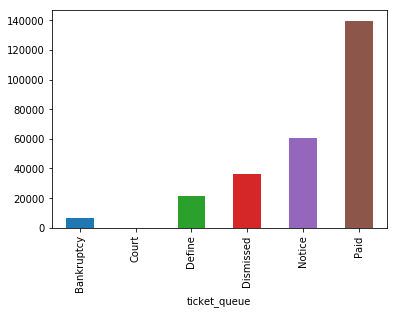

In [7]:
expired.groupby("ticket_queue").size().plot(kind='bar', x="index", y="values")

In [9]:
expired.groupby("ticket_queue").size().sort_values(ascending=False)

ticket_queue
Paid          139750
Notice         60263
Dismissed      36196
Define         21401
Bankruptcy      6542
Court             26
dtype: int64

In [22]:
paid = expired[expired["ticket_queue"] == "Paid"]

In [26]:
paid

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,notice_number,dismissal_reason,officer,normalized_address,year,month,hour,ward,geocode_accuracy,geocode_accuracy_type,geocoded_address,geocoded_lng,geocoded_lat
11493,27553846,1998-10-30 09:35:00,1427 N LEAVITT,0331123c7e7da8de58f2d1609fd2e8c3c09e91f96d5404...,IL,PAS,606220000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,14,CPD,JEEP,25,50,0,50.00,Paid,2002-11-07 00:00:00,SEIZ,0,NaN,16568,"1400 n leavitt, Chicago, IL",1998,10,9,2,1,range_interpolation,"1400 N Leavitt St, Chicago, IL 60622",-87.682245,41.906895
11494,27561155,1998-10-30 10:00:00,1434 N LEAVITT,0331123c7e7da8de58f2d1609fd2e8c3c09e91f96d5404...,IL,PAS,606220000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,14,CPD,JEEP,25,50,0,50.00,Paid,2002-11-07 00:00:00,SEIZ,0,NaN,17760,"1400 n leavitt, Chicago, IL",1998,10,10,2,1,range_interpolation,"1400 N Leavitt St, Chicago, IL 60622",-87.682245,41.906895
18185,27485469,1998-10-06 16:20:00,220 E GRAND,b50193cc8b9fb97ff500974195d9c3658ceaba9250858a...,IL,PAS,601950000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,18,CPD,TOYT,25,50,0,50.00,Paid,2007-04-27 00:00:00,SEIZ,5019676810,NaN,15162,"200 e grand, Chicago, IL",1998,10,16,42,1,range_interpolation,"200 E Grand Ave, Chicago, IL 60611",-87.622669,41.89191
21809,26954349,1998-10-06 11:45:00,220 E. GRAND,b50193cc8b9fb97ff500974195d9c3658ceaba9250858a...,IL,PAS,601950000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,152,CPD,TOYT,25,50,0,50.00,Paid,2007-04-27 00:00:00,SEIZ,5019676810,NaN,15082,"200 e. grand, Chicago, IL",1998,10,11,42,1,range_interpolation,"200 E Grand Ave, Chicago, IL 60611",-87.622669,41.89191
29004,28057375,1998-12-25 10:04:00,4630 N MALDEN,b799c1c758646fca2800e4ddf2b6f1286210929c8c3e02...,IL,PAS,601940000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,23,CPD,OLDS,25,50,0,50.00,Paid,2008-03-27 00:00:00,SEIZ,5017837850,NaN,2970,"4600 n malden, Chicago, IL",1998,12,10,46,1,range_interpolation,"4600 N Malden St, Chicago, IL 60640",-87.66243,41.965478
109057,29237596,1999-06-23 18:45:00,69 E CEDAR,4e251dcf5e02491e98eb52dc19dd203c1d6b984e2fde94...,IL,PAS,609140000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,18,CPD,MERZ,25,50,0,50.00,Paid,2004-08-13 00:00:00,SEIZ,5024792840,NaN,14324,"1 e cedar, Chicago, IL",1999,6,18,2,1,range_interpolation,"1 E Cedar St, Chicago, IL 60611",-87.628368,41.902388
109058,29359631,1999-06-23 20:45:00,69 E CEDAR,4e251dcf5e02491e98eb52dc19dd203c1d6b984e2fde94...,IL,PAS,609140000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,18,CPD,MERZ,25,50,0,50.00,Paid,2004-08-13 00:00:00,SEIZ,5024792840,NaN,12892,"1 e cedar, Chicago, IL",1999,6,20,2,1,range_interpolation,"1 E Cedar St, Chicago, IL 60611",-87.628368,41.902388
110783,30903055,1999-12-08 10:50:00,2457 N CLARK,4f8279bfcd97c883688ab1f3567bdc9b3b7f3da613f645...,IL,PAS,606140000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,23,CPD,GMC,25,50,0,50.00,Paid,2004-05-17 00:00:00,SEIZ,5016683640,NaN,06613,"2400 n clark, Chicago, IL",1999,12,10,43,1,range_interpolation,"2400 N Clark St, Chicago, IL 60614",-87.640478,41.925734
111650,30194538,1999-09-07 05:32:00,714 DIVISION,9f9abe10f2e0044dd2d0350ec0fe0bc4e4d8ca37f527cc...,IL,PAS,606100000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,18,CPD,BUIC,25,50,0,61.00,Paid,2018-03-17 00:00:00,SEIZ,5019737600,NaN,12383,"700 division, Chicago, IL",1999,9,5,27,1,rooftop,"700 W Division St, Chicago, IL 60610",-87.646137,41.903919
111742,30190496,1999-10-14 20:50:00,1523 N ELM GROVE,e9eb2a50f66d9a7bab9f364c1210b058406e54d92928d6...,IL,PAS,606140000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,14,CPD,JEEP,25,50,0,50.00,Paid,2004-07-19 00:00:00,SEIZ,5020597300,NaN,16568,"1500 n elm grove, Chicago, IL",1999,10,20,NaN,0.3,roof

In [19]:
data["total_payments"] = data["total_payments"].astype(float)

In [23]:
paid.total_payments.sum()

11217693.49

In [25]:
expired.groupby("ward").size().sort_values(ascending=False)

ward
42    15388
44    10453
4     10183
27     9452
2      8728
43     8569
3      8046
1      7902
20     7800
6      7593
5      7098
16     6934
28     6906
25     6352
17     6083
46     6039
24     5648
32     5480
8      5453
48     5282
7      5015
21     4896
37     4793
47     4719
26     4580
49     4389
40     4057
35     3817
29     3747
33     3732
34     3353
15     3123
11     2986
12     2661
30     2652
22     2505
31     2415
9      2413
50     2352
41     2309
23     2224
14     1837
10     1598
39     1573
45     1474
36     1453
18     1358
38     1123
13     1111
19      987
dtype: int64

In [6]:
data.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,notice_number,dismissal_reason,officer,normalized_address,year,month,hour,ward,geocode_accuracy,geocode_accuracy_type,geocoded_address,geocoded_lng,geocoded_lat
0,24994884,1998-01-01 21:39:00,1121 N STATE,712bbad063faafaa4c8c211b14a1121e9af4ffb2074a3c...,IL,PAS,604260000,0964080B,NO STANDING/PARKING TIME RESTRICTED,NaN,Unidentified,CHEV,30,60,73.2,0,Notice,1998-04-15 00:00:00,SEIZ,5024611080,NaN,004499,"1100 n state, Chicago, IL",1998,1,21,2,0.6,rooftop,"1100 N State St, Chicago, IL 60610",-87.628557,41.902092
1,24882856,1998-01-01 22:35:00,1119 N STATE,712bbad063faafaa4c8c211b14a1121e9af4ffb2074a3c...,IL,PAS,604260000,0964080B,NO STANDING/PARKING TIME RESTRICTED,NaN,Unidentified,CHEV,30,60,73.2,0,Notice,1998-04-08 00:00:00,SEIZ,5024611080,NaN,011335,"1100 n state, Chicago, IL",1998,1,22,2,0.6,rooftop,"1100 N State St, Chicago, IL 60610",-87.628557,41.902092
2,25007842,1998-01-02 07:35:00,77 E RANDOLPH,cf73c2720624c750cfc58214ff926a9fcfd6544be12112...,IL,TXI,602010000,0964110C,PARK OR STAND ON CROSSWALK,NaN,Unidentified,OTHR,50,100,0,0,Dismissed,2005-08-21 00:00:00,SEIZ,5013465850,Other,030018,"1 e randolph, Chicago, IL",1998,1,7,42,1,range_interpolation,"1 E Randolph St, Chicago, IL 60601",-87.62791,41.88434
3,25007844,1998-01-02 08:04:00,77 E RANDOLPH,cf73c2720624c750cfc58214ff926a9fcfd6544be12112...,IL,TXI,602010000,0964110C,PARK OR STAND ON CROSSWALK,NaN,Unidentified,OTHR,50,100,0,0,Dismissed,2005-08-21 00:00:00,SEIZ,5035651900,Other,030018,"1 e randolph, Chicago, IL",1998,1,8,42,1,range_interpolation,"1 E Randolph St, Chicago, IL 60601",-87.62791,41.88434
4,9019011843,1998-01-02 08:23:00,3315 N BROADWAY,33bed663926a56854dc5b523eb4d9f4b2d1ef7cc48aa16...,OH,OTH,442230000,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,NaN,Unidentified,TOYT,20,40,0,0,Dismissed,2005-08-21 00:00:00,FINL,5024284550,Other,000235,"3300 n broadway, Chicago, IL",1998,1,8,44,1,rooftop,"3300 N Broadway, Chicago, IL 60657",-87.64469,41.942326


In [6]:
expired = data[data["violation_description"] == "EXPIRED PLATES OR TEMPORARY REGISTRATION"]
expired

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,notice_number,dismissal_reason,officer,normalized_address,year,month,hour,ward,geocode_accuracy,geocode_accuracy_type,geocoded_address,geocoded_lng,geocoded_lat
11493,27553846,1998-10-30 09:35:00,1427 N LEAVITT,0331123c7e7da8de58f2d1609fd2e8c3c09e91f96d5404...,IL,PAS,606220000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,14,CPD,JEEP,25,50,0,50,Paid,2002-11-07 00:00:00,SEIZ,0,NaN,16568,"1400 n leavitt, Chicago, IL",1998,10,9,2,1,range_interpolation,"1400 N Leavitt St, Chicago, IL 60622",-87.682245,41.906895
11494,27561155,1998-10-30 10:00:00,1434 N LEAVITT,0331123c7e7da8de58f2d1609fd2e8c3c09e91f96d5404...,IL,PAS,606220000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,14,CPD,JEEP,25,50,0,50,Paid,2002-11-07 00:00:00,SEIZ,0,NaN,17760,"1400 n leavitt, Chicago, IL",1998,10,10,2,1,range_interpolation,"1400 N Leavitt St, Chicago, IL 60622",-87.682245,41.906895
14382,26591973,1998-07-05 08:26:00,1444 W FARWELL,c2a1d61435bbdfec978c877f1e0fd1be00d269f6bff22d...,WI,PAS,000000000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,NaN,Unidentified,FORD,25,50,25,0,Define,2001-12-25 00:00:00,NaN,0,NaN,016973,"1400 w farwell, Chicago, IL",1998,7,8,49,1,rooftop,"1400 W Farwell Ave, Chicago, IL 60626",-87.666028,42.007041
14383,26591972,1998-07-05 08:26:00,1444 W FARWELL,c2a1d61435bbdfec978c877f1e0fd1be00d269f6bff22d...,WI,PAS,000000000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,NaN,Unidentified,FORD,25,50,25,0,Define,2001-12-25 00:00:00,NaN,0,NaN,016973,"1400 w farwell, Chicago, IL",1998,7,8,49,1,rooftop,"1400 W Farwell Ave, Chicago, IL 60626",-87.666028,42.007041
18185,27485469,1998-10-06 16:20:00,220 E GRAND,b50193cc8b9fb97ff500974195d9c3658ceaba9250858a...,IL,PAS,601950000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,18,CPD,TOYT,25,50,0,50,Paid,2007-04-27 00:00:00,SEIZ,5019676810,NaN,15162,"200 e grand, Chicago, IL",1998,10,16,42,1,range_interpolation,"200 E Grand Ave, Chicago, IL 60611",-87.622669,41.89191
21809,26954349,1998-10-06 11:45:00,220 E. GRAND,b50193cc8b9fb97ff500974195d9c3658ceaba9250858a...,IL,PAS,601950000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,152,CPD,TOYT,25,50,0,50,Paid,2007-04-27 00:00:00,SEIZ,5019676810,NaN,15082,"200 e. grand, Chicago, IL",1998,10,11,42,1,range_interpolation,"200 E Grand Ave, Chicago, IL 60611",-87.622669,41.89191
25287,26839714,1998-08-15 08:50:00,4328 W LEMOYNE,d18afa28f5610b6fe38179e39bc12848a568e7acf2b9bf...,IL,PAS,606120000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,NaN,Unidentified,CADI,25,50,61,0,Notice,1998-10-24 00:00:00,SEIZ,5023862200,NaN,008979,"4300 w lemoyne, Chicago, IL",1998,8,8,26,1,range_interpolation,"4300 W Lemoyne St, Chicago, IL 60651",-87.733813,41.907516
25288,26839703,1998-08-15 09:41:00,4328 W LEMOYNE,d18afa28f5610b6fe38179e39bc12848a568e7acf2b9bf...,IL,PAS,606120000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,NaN,Unidentified,CADI,25,50,61,0,Notice,1998-10-24 00:00:00,SEIZ,5023862200,NaN,008979,"4300 w lemoyne, Chicago, IL",1998,8,9,26,1,range_interpolation,"4300 W Lemoyne St, Chicago, IL 60651",-87.733813,41.907516
29004,28057375,1998-12-25 10:04:00,4630 N MALDEN,b799c1c758646fca2800e4ddf2b6f1286210929c8c3e02...,IL,PAS,601940000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,23,CPD,OLDS,25,50,0,50,Paid,2008-03-27 00:00:00,SEIZ,5017837850,NaN,2970,"4600 n malden, Chicago, IL",1998,12,10,46,1,range_interpolation,"4600 N Malden St, Chicago, IL 60640",-87.66243,41.965478
29007,28060374,1998-12-25 12:01:00,4603 N MALDEN,b799c1c758646fca2800e4ddf2b6f1286210929c8c3e02...,IL,NaN,000000000,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,2,CPD,OLDS,25,50,25,0,Define,1999-05-01 00:00:00,NaN,0,NaN,2970,"4600 n malden, Chicago, IL",1998,12,24,46,1